In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
Lat_lng = list(coordinates)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=69a5742ec3852cc037ea2b80733d1d63


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bambanglipuro
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | olovyannaya
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | grand river south east
City not foun

Processing Record 37 of Set 4 | saint-augustin
Processing Record 38 of Set 4 | hoa binh
Processing Record 39 of Set 4 | gasa
Processing Record 40 of Set 4 | ramsi
Processing Record 41 of Set 4 | kirkwall
Processing Record 42 of Set 4 | meyungs
City not found. Skipping...
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | eskisehir
Processing Record 47 of Set 4 | senanga
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | tongren
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | bilma
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | kargopol
Processing Record 10 of Set 5 | kudat
Proc

Processing Record 30 of Set 8 | cocorit
Processing Record 31 of Set 8 | diamond harbour
Processing Record 32 of Set 8 | coyah
Processing Record 33 of Set 8 | maxixe
Processing Record 34 of Set 8 | mendi
Processing Record 35 of Set 8 | mandalgovi
Processing Record 36 of Set 8 | oussouye
Processing Record 37 of Set 8 | kaliganj
Processing Record 38 of Set 8 | price
Processing Record 39 of Set 8 | porto velho
Processing Record 40 of Set 8 | santo augusto
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | chagoda
Processing Record 43 of Set 8 | svetlogorsk
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | penarroya-pueblonuevo
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | port macquarie
Processing Record 48 of Set 8 | madhupur
Processing Record 49 of Set 8 | sabha
Processing Record 50 of Set 8 | nome
Processing Record 1 of Set 9 | ojinaga
Processing Record 2 of Set 9 | verdun
Processing Record 3 of Set 9 | ossora
Processin

Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | ust-maya
Processing Record 20 of Set 12 | grand-santi
Processing Record 21 of Set 12 | havelock
Processing Record 22 of Set 12 | yining
Processing Record 23 of Set 12 | veraval
Processing Record 24 of Set 12 | sapao
City not found. Skipping...
Processing Record 25 of Set 12 | malbork
Processing Record 26 of Set 12 | bulgan
Processing Record 27 of Set 12 | seminole
Processing Record 28 of Set 12 | bac lieu
Processing Record 29 of Set 12 | roald
Processing Record 30 of Set 12 | maniitsoq
Processing Record 31 of Set 12 | haimen
Processing Record 32 of Set 12 | sao filipe
Processing Record 33 of Set 12 | muli
Processing Record 34 of Set 12 | kapoeta
Processing Record 35 of Set 12 | falun
Processing Record 36 of Set 12 | teeli
Processing Record 37 of Set 12 | comodoro rivadavia
Processing Record 38 of Set 12 | atasu
Processing Record 39 of Set 12 | turukhansk
Processing Record 40 of Set 12 | urk
Processing Reco

In [19]:
len(city_data)

563

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-8.32,98,95,10.76,RU,2022-02-03 00:24:54
1,Butaritari,3.0707,172.7902,81.90,78,63,16.89,KI,2022-02-03 00:28:00
2,Taltal,-25.4000,-70.4833,68.32,74,17,4.47,CL,2022-02-03 00:26:21
3,Vaini,-21.2000,-175.2000,87.96,70,20,6.91,TO,2022-02-03 00:26:31
4,Dingle,10.9995,122.6711,78.69,83,94,10.27,PH,2022-02-03 00:28:01
5,Pevek,69.7008,170.3133,-6.99,74,4,4.65,RU,2022-02-03 00:23:13
6,Khandyga,62.6667,135.6000,-32.94,98,100,1.72,RU,2022-02-03 00:28:01
7,Nikolskoye,59.7035,30.7861,19.29,99,97,1.21,RU,2022-02-03 00:26:25
8,Cape Town,-33.9258,18.4232,66.11,90,75,3.00,ZA,2022-02-03 00:27:18
9,Bambanglipuro,-7.9500,110.2833,78.01,80,86,4.21,ID,2022-02-03 00:28:02


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-02-03 00:24:54,73.5069,80.5464,-8.32,98,95,10.76
1,Butaritari,KI,2022-02-03 00:28:00,3.0707,172.7902,81.90,78,63,16.89
2,Taltal,CL,2022-02-03 00:26:21,-25.4000,-70.4833,68.32,74,17,4.47
3,Vaini,TO,2022-02-03 00:26:31,-21.2000,-175.2000,87.96,70,20,6.91
4,Dingle,PH,2022-02-03 00:28:01,10.9995,122.6711,78.69,83,94,10.27
...,...,...,...,...,...,...,...,...,...
558,Los Llanos De Aridane,ES,2022-02-03 00:37:59,28.6585,-17.9182,64.13,71,75,11.99
559,Nanortalik,GL,2022-02-03 00:42:44,60.1432,-45.2371,13.33,61,100,9.84
560,Houma,US,2022-02-03 00:40:02,29.5958,-90.7195,69.80,93,75,3.44
561,Oliver,CA,2022-02-03 00:42:44,49.1831,-119.5524,25.52,50,100,3.44


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

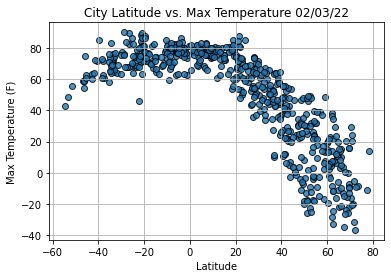

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

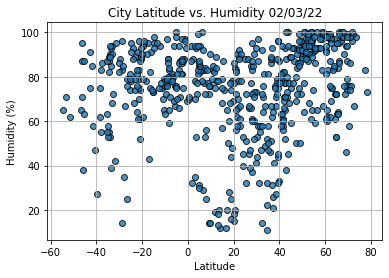

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

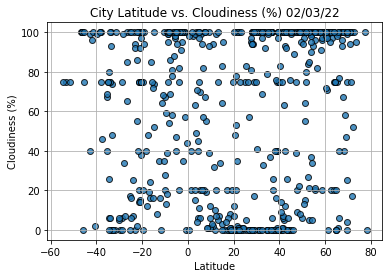

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

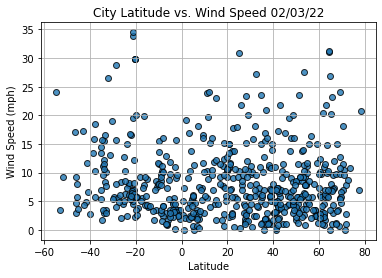

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()